#### 1. Implement an MLP by varying bias, weights, and learning rate, and record observations for different learning rate values. Plot a graph showing the relationship between loss (error) and learning rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/kaggle/input/breast-cancer/breast-cancer.csv')
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Scaling (CRITICAL for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

errors = []
train_accuracies = []
test_accuracies = []
weights_norm = []
bias_values = []

for lr in learning_rates:
    perceptron = Perceptron(
        eta0=lr,
        max_iter=1000,
        tol=1e-3,
        random_state=0
    )

    perceptron.fit(X_train, y_train)

    # Predictions
    y_train_pred = perceptron.predict(X_train)
    y_test_pred = perceptron.predict(X_test)

    # Error (loss)
    error = np.mean(y_train_pred != y_train)
    errors.append(error)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Weights & bias
    weights_norm.append(np.linalg.norm(perceptron.coef_))
    bias_values.append(perceptron.intercept_[0])

    print(
        f"LR={lr:<6} | "
        f"Train Acc={train_acc:.4f} | "
        f"Test Acc={test_acc:.4f} | "
        f"Error={error:.4f} | "
        f"||W||={weights_norm[-1]:.3f} | "
        f"Bias={bias_values[-1]:.3f}"
    )


LR=0.0001 | Train Acc=0.9774 | Test Acc=0.9591 | Error=0.0226 | ||W||=0.003 | Bias=0.000
LR=0.001  | Train Acc=0.9774 | Test Acc=0.9591 | Error=0.0226 | ||W||=0.026 | Bias=0.003
LR=0.01   | Train Acc=0.9799 | Test Acc=0.9415 | Error=0.0201 | ||W||=0.292 | Bias=0.020
LR=0.1    | Train Acc=0.9849 | Test Acc=0.9532 | Error=0.0151 | ||W||=3.142 | Bias=0.200
LR=1.0    | Train Acc=0.9849 | Test Acc=0.9532 | Error=0.0151 | ||W||=31.416 | Bias=2.000


**Final Conclusion**

* Training accuracy remained nearly constant across all learning rates and was therefore not a reliable metric for comparison.
* Test accuracy was highest at learning rates **0.0001** and **0.001**, indicating better generalization.
* From **lr = 0.1** onwards, the weight magnitude increased sharply, showing signs of unstable learning and parameter explosion.
* Bias values also increased significantly at higher learning rates, indicating instability in the decision boundary.
* Although **lr = 0.0001** achieved similar test accuracy, learning was slower due to very small parameter updates.
* **lr = 0.001** provided the best balance between learning efficiency, parameter stability, and generalization performance.
* Weights and bias converged smoothly at **lr = 0.001** without sudden fluctuations.
* Therefore, considering test accuracy, convergence behavior, and stability of model parameters, the optimal learning rate for this Perceptron model is **0.001**. - **GENERALISED**, next ones cause overfitting.


### 2.Implement an MLP using the Gradient Descent algorithm, and analyze the convergence behavior and performance of the network.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
class MLPPerceptron:
    
    def __init__(self, n_input, n_hidden, n_output, lr=0.01, epochs=5000):
        self.lr = lr
        self.epochs = epochs

        self.W1 = np.random.randn(n_input, n_hidden)
        self.b1 = np.zeros((1, n_hidden))

        self.W2 = np.random.randn(n_hidden, n_output)
        self.b2 = np.zeros((1, n_output))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X, y):
        losses = []

        for epoch in range(self.epochs):
            # Forward pass
            z1 = np.dot(X, self.W1) + self.b1
            a1 = self.sigmoid(z1)

            z2 = np.dot(a1, self.W2) + self.b2
            y_hat = self.sigmoid(z2)

            # Loss (MSE)
            loss = np.mean((y - y_hat) ** 2)
            losses.append(loss)

            # Backpropagation
            delta_output = (y_hat - y) * self.sigmoid_derivative(y_hat)
            delta_hidden = np.dot(delta_output, self.W2.T) * self.sigmoid_derivative(a1)

            # Weight updates
            self.W2 -= self.lr * np.dot(a1.T, delta_output)
            self.b2 -= self.lr * np.sum(delta_output, axis=0, keepdims=True)

            self.W1 -= self.lr * np.dot(X.T, delta_hidden)
            self.b1 -= self.lr * np.sum(delta_hidden, axis=0, keepdims=True)

        return losses

    def predict(self, X):
        a1 = self.sigmoid(np.dot(X, self.W1) + self.b1)
        y_hat = self.sigmoid(np.dot(a1, self.W2) + self.b2)
        return (y_hat >= 0.5).astype(int)


In [4]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Reshape labels (CRITICAL)
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [100, 50, 10]

results = {}

for lr in learning_rates:
    for epochs in epochs_list:
        print(f"\nTraining with lr={lr}, epochs={epochs}")

        mlp = MLPPerceptron(
            n_input=X_train.shape[1],
            n_hidden=7,
            n_output=1,
            lr=lr,
            epochs=epochs
        )

        losses = mlp.fit(X_train, y_train)
        preds = mlp.predict(X_test)

        accuracy = np.mean(preds == y_test)
        results[(lr, epochs)] = (losses, accuracy)

        print(f"Accuracy: {accuracy:.4f}")



Training with lr=0.001, epochs=100
Accuracy: 0.9386

Training with lr=0.001, epochs=50
Accuracy: 0.8772

Training with lr=0.001, epochs=10
Accuracy: 0.7632

Training with lr=0.01, epochs=100
Accuracy: 0.9912

Training with lr=0.01, epochs=50
Accuracy: 0.9649

Training with lr=0.01, epochs=10
Accuracy: 0.9474

Training with lr=0.1, epochs=100
Accuracy: 0.9912

Training with lr=0.1, epochs=50
Accuracy: 0.9825

Training with lr=0.1, epochs=10
Accuracy: 0.9649


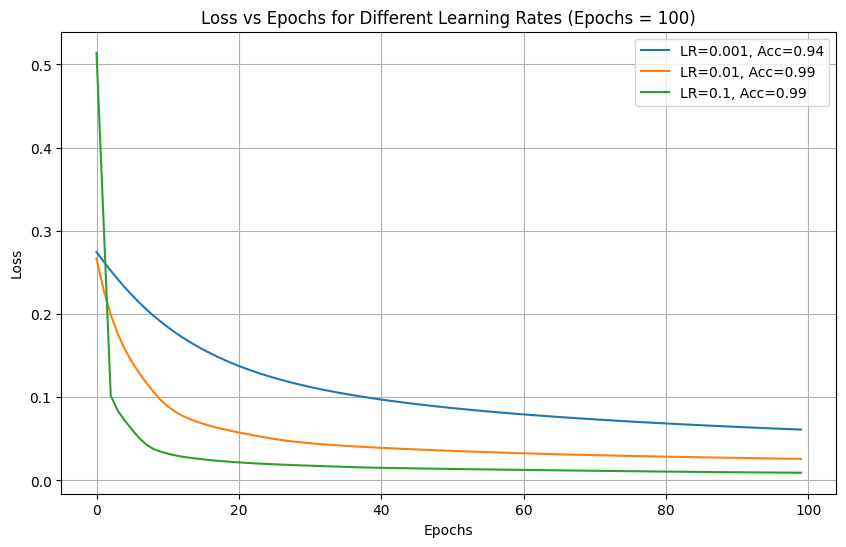

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for (lr, epochs), (losses, acc) in results.items():
    if epochs == 100:   # ✅ must match epochs_list
        plt.plot(
            range(len(losses)),
            losses,
            label=f"LR={lr}, Acc={acc:.2f}"
        )

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Different Learning Rates (Epochs = 100)")
plt.legend()
plt.grid(True)
plt.show()


### 3. Implement a Perceptron on IRIS Dataset what are your observations with respect to learning rate using Perceptron class in sklearn. (explore all the parameters of Perceptron class).

In [7]:
# Load IRIS dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

train_accuracies = []
test_accuracies = []

print("Learning Rate Analysis:\n")

for lr in learning_rates:
    perceptron = Perceptron(
        eta0=lr,
        max_iter=1000,
        tol=1e-3,
        fit_intercept=True,
        shuffle=True,
        random_state=42
    )

    perceptron.fit(X_train, y_train)

    # Predictions
    y_train_pred = perceptron.predict(X_train)
    y_test_pred = perceptron.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"LR={lr:<6} | Train Acc={train_acc:.4f} | Test Acc={test_acc:.4f}")


Learning Rate Analysis:

LR=0.0001 | Train Acc=0.8762 | Test Acc=0.8889
LR=0.001  | Train Acc=0.8762 | Test Acc=0.8889
LR=0.01   | Train Acc=0.8762 | Test Acc=0.8889
LR=0.1    | Train Acc=0.9048 | Test Acc=0.8889
LR=1.0    | Train Acc=0.9048 | Test Acc=0.8889


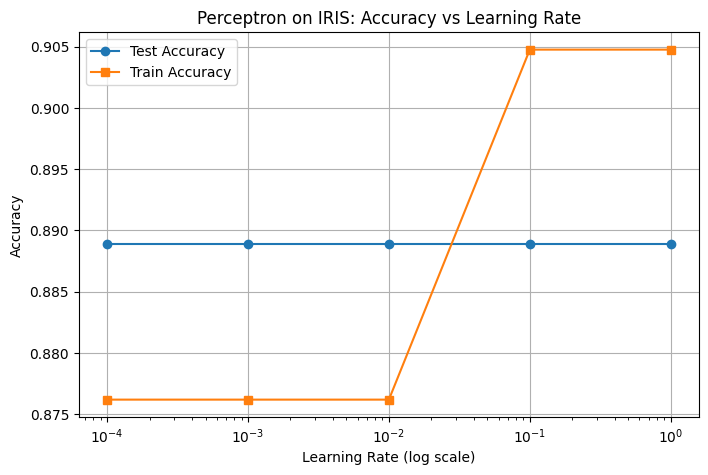

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, test_accuracies, marker='o', label="Test Accuracy")
plt.plot(learning_rates, train_accuracies, marker='s', label="Train Accuracy")
plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Accuracy")
plt.title("Perceptron on IRIS: Accuracy vs Learning Rate")
plt.legend()
plt.grid(True)
plt.show()
